# 🔍 BoT-IoT Dataset Overview

The **BoT-IoT (Botnet Internet of Things)** dataset is a comprehensive dataset designed for network intrusion detection research. It simulates real-world IoT environments and includes both benign and malicious traffic.

## 📦 Dataset Highlights:
- **Source:** University of New South Wales (UNSW)
- **Total Records:** Millions of rows (sampled in this project for performance)
- **Features:** 
  - Network flow statistics (packet counts, durations, flags)
  - Protocol-specific attributes (TCP, UDP, ICMP fields)
  - Generated and labeled using realistic virtual IoT setups

## 🎯 Target Variable:
- `attack`: Binary label indicating whether the traffic is normal (`0`) or malicious (`1`)

## 💡 Use Case:
This dataset is used to build, evaluate, and optimize machine learning models for **network intrusion detection** in IoT environments, focusing on both **feature selection** and **classification performance**.

---


## 🔬 Experiment 1: Data Loading

In this step, we load the full BoT-IoT dataset into a single Pandas DataFrame. 
This ensures all features are accessible for unified preprocessing and modeling.


In [3]:
import pandas as pd

# 1) Explicitly list each CSV file
files = [
    'UNSW_2018_IoT_Botnet_Full5pc_1.csv',
    'UNSW_2018_IoT_Botnet_Full5pc_2.csv',
    'UNSW_2018_IoT_Botnet_Full5pc_3.csv',
    'UNSW_2018_IoT_Botnet_Full5pc_4.csv'
]

# 2) Read and concatenate
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

# 3) Save merged output and preview
df.to_csv('Combined_BoT_IoT.csv', index=False)
df.head()


/tmp/ipykernel_135671/192823043.py:12: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
/tmp/ipykernel_135671/192823043.py:12: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
/tmp/ipykernel_135671/192823043.py:12: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
/tmp/ipykernel_135671/192823043.py:12: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)


,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1,1.528089e+09,e,1,tcp,1,192.168.100.147,49960,192.168.100.7,80,...,1.12704,96,75,1.133720,1.129970,770,602,1,DoS,HTTP
1,2,1.528089e+09,e,1,arp,2,192.168.100.7,-1,192.168.100.147,-1,...,15267.20000,1,2,0.005142,0.005142,2,6,1,DoS,HTTP
2,3,1.528089e+09,e,1,tcp,1,192.168.100.147,49962,192.168.100.7,80,...,1.12704,96,75,1.135100,1.129970,770,602,1,DoS,HTTP
3,4,1.528089e+09,e,1,tcp,1,192.168.100.147,49964,192.168.100.7,80,...,1.12704,96,75,1.135140,1.129970,770,602,1,DoS,HTTP
4,5,1.528089e+09,e,1,tcp,1,192.168.100.147,49966,192.168.100.7,80,...,1.12704,96,75,1.135260,1.129970,770,602,1,DoS,HTTP


## 🔬 Experiment 2: Initial EDA

Compute the number and percentage of missing values per feature, and count duplicate records to assess dataset integrity.


In [4]:
import pandas as pd

# Count missing values and percentages
missing = df.isnull().sum()
missing_pct = missing / len(df) * 100

# Build a small summary table
missing_summary = pd.DataFrame({
    'missing_count': missing,
    'missing_percent': missing_pct
})

# Count duplicates
duplicate_count = df.duplicated().sum()

# Output results
print(f"Total duplicate rows: {duplicate_count}\n")
missing_summary.sort_values('missing_count', ascending=False).head(10)


Total duplicate rows: 0



,missing_count,missing_percent
pkSeqID,0,0.0
stime,0,0.0
flgs,0,0.0
flgs_number,0,0.0
proto,0,0.0
proto_number,0,0.0
saddr,0,0.0
sport,0,0.0
daddr,0,0.0
dport,0,0.0


## 🔬 Experiment 3: Data Cleaning & Preprocessing

Remove duplicate rows (if any), drop non-informative `pkSeqID`, and convert `stime` to datetime to enable time-based feature engineering.


In [5]:
# 1) Remove any duplicate rows (none in our dataset, but safe to include)
df = df.drop_duplicates()

# 2) Drop the sequential ID column
df = df.drop(columns=['pkSeqID'])

# 3) Convert the UNIX timestamp to datetime
df['stime'] = pd.to_datetime(df['stime'], unit='s')

# 4) Save the cleaned data and display its new shape
df.to_csv('Cleaned_BoT_IoT.csv', index=False)
print(f"Cleaned DataFrame shape: {df.shape}")
df.head()


Cleaned DataFrame shape: (3668522, 45)


,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,pkts,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,2018-06-04 05:02:01.712009907,e,1,tcp,1,192.168.100.147,49960,192.168.100.7,80,8,...,1.12704,96,75,1.133720,1.129970,770,602,1,DoS,HTTP
1,2018-06-04 05:02:01.719820023,e,1,arp,2,192.168.100.7,-1,192.168.100.147,-1,2,...,15267.20000,1,2,0.005142,0.005142,2,6,1,DoS,HTTP
2,2018-06-04 05:02:01.720599890,e,1,tcp,1,192.168.100.147,49962,192.168.100.7,80,8,...,1.12704,96,75,1.135100,1.129970,770,602,1,DoS,HTTP
3,2018-06-04 05:02:01.720880032,e,1,tcp,1,192.168.100.147,49964,192.168.100.7,80,8,...,1.12704,96,75,1.135140,1.129970,770,602,1,DoS,HTTP
4,2018-06-04 05:02:01.721659899,e,1,tcp,1,192.168.100.147,49966,192.168.100.7,80,8,...,1.12704,96,75,1.135260,1.129970,770,602,1,DoS,HTTP


## 🔬 Experiment 4: Data Visualization

Create box plots, histograms, bar charts, a correlation heatmap, and a scatter matrix to uncover distributions, outliers, and feature relationships.


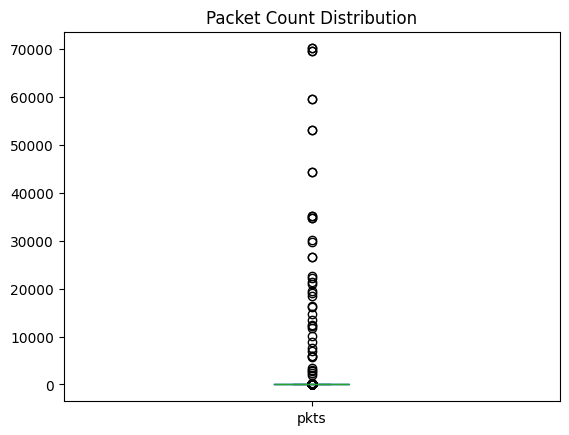

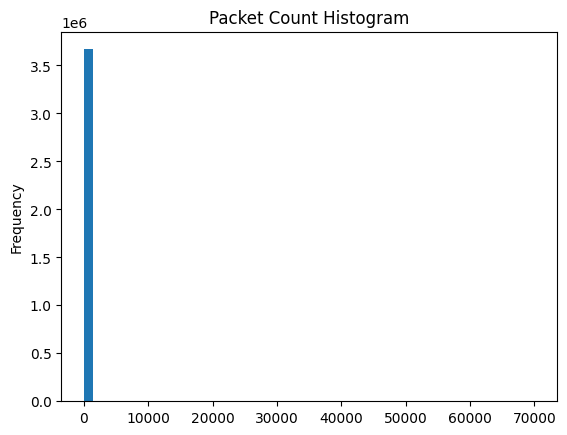

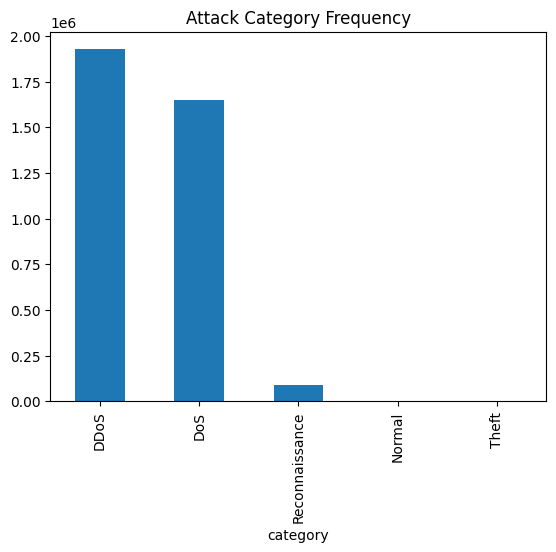

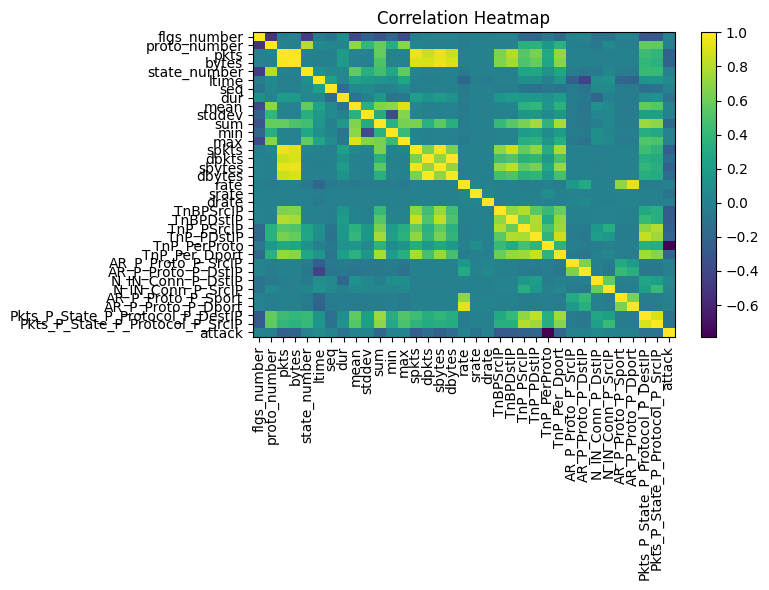

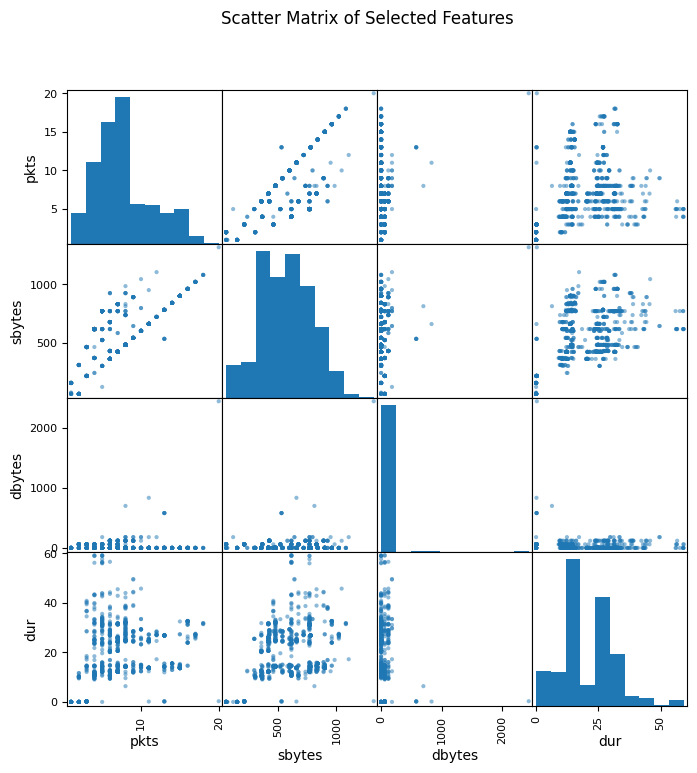

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix

# 1) Box plot of packet counts
plt.figure()
df['pkts'].plot.box()
plt.title('Packet Count Distribution')
plt.show()

# 2) Histogram of packet counts
plt.figure()
df['pkts'].plot.hist(bins=50)
plt.title('Packet Count Histogram')
plt.show()

# 3) Bar chart of attack category frequencies
plt.figure()
df['category'].value_counts().plot.bar()
plt.title('Attack Category Frequency')
plt.show()

# 4) Correlation heatmap for numeric features
numeric = df.select_dtypes(include=[np.number])
corr = numeric.corr()
plt.figure(figsize=(8, 6))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.title('Correlation Heatmap')
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.index)
plt.tight_layout()
plt.show()

# 5) Scatter matrix for a sample of key features
sample = df[['pkts', 'sbytes', 'dbytes', 'dur']].sample(n=1000, random_state=42)
scatter_matrix(sample, diagonal='hist', alpha=0.5, figsize=(8, 8))
plt.suptitle('Scatter Matrix of Selected Features')
plt.show()


## 🔬 Experiment 5: Encoding Categorical Variables

Convert text features to numeric form: apply one‐hot encoding to `category` and `subcategory`, and label‐encode protocol identifiers, ensuring all features are machine‐readable.


In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 1) Label-encode the 'proto' column
le = LabelEncoder()
df['proto_le'] = le.fit_transform(df['proto'])

# 2) One-hot encode 'category' and 'subcategory' using the updated parameter
ohe = OneHotEncoder(sparse_output=False, drop='first')
cats = ohe.fit_transform(df[['category', 'subcategory']])
cat_cols = ohe.get_feature_names_out()

# 3) Assemble the final DataFrame
df_encoded = pd.concat([
    df.drop(columns=['category', 'subcategory', 'proto']),
    pd.DataFrame(cats, columns=cat_cols, index=df.index)
], axis=1)

# 4) Save and verify
df_encoded.to_csv('Encoded_BoT_IoT.csv', index=False)
df_encoded.head()


,stime,flgs,flgs_number,proto_number,saddr,sport,daddr,dport,pkts,bytes,...,category_Normal,category_Reconnaissance,category_Theft,subcategory_HTTP,subcategory_Keylogging,subcategory_Normal,subcategory_OS_Fingerprint,subcategory_Service_Scan,subcategory_TCP,subcategory_UDP
0,2018-06-04 05:02:01.712009907,e,1,1,192.168.100.147,49960,192.168.100.7,80,8,1980,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-06-04 05:02:01.719820023,e,1,2,192.168.100.7,-1,192.168.100.147,-1,2,120,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-06-04 05:02:01.720599890,e,1,1,192.168.100.147,49962,192.168.100.7,80,8,2126,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-06-04 05:02:01.720880032,e,1,1,192.168.100.147,49964,192.168.100.7,80,8,2024,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-06-04 05:02:01.721659899,e,1,1,192.168.100.147,49966,192.168.100.7,80,8,2319,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## 🔬 Experiment 6: Scaling & Balancing

Standardize numeric features with StandardScaler, then apply SMOTE to balance the binary `attack` classes, ensuring models learn from all categories equally.


In [4]:
# Experiment 6: Balanced and Reduced Dataset (Working Version)

import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

# Load and clean
df = pd.read_csv("Encoded_BoT_IoT.csv", low_memory=False)
df.dropna(inplace=True)

# Separate target and numeric features
y = df['attack']
X = df.drop(columns=['attack'])
X = X.select_dtypes(include=[np.number])
y = y.loc[X.index]

# Counts before
print("Before balancing:\n", y.value_counts())

# Target sample size
total_samples = 100_000
target_attack = int(0.6 * total_samples)
target_normal = total_samples - target_attack

# Separate normal and attack
attack_indices = y[y != 0].index
normal_indices = y[y == 0].index

# 1. Undersample attacks to 60k
X_attack = X.loc[attack_indices]
y_attack = y.loc[attack_indices]
X_attack_sampled = X_attack.sample(n=target_attack, random_state=42)
y_attack_sampled = y_attack.loc[X_attack_sampled.index]

# 2. Combine with full normal class temporarily for SMOTE
X_temp = pd.concat([X_attack_sampled, X.loc[normal_indices]], axis=0)
y_temp = pd.concat([y_attack_sampled, y.loc[normal_indices]], axis=0)

# 3. Apply SMOTE to get normal class to 40k
smote = SMOTE(sampling_strategy={0: target_normal}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_temp, y_temp)

# Final shuffle
df_final = pd.DataFrame(X_resampled)
df_final['attack'] = y_resampled
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)

# Save
df_final.to_csv("Balanced_Reduced_BoT_IoT.csv", index=False)

# Final check
print("After balancing:\n", df_final['attack'].value_counts())
print("Final dataset shape:", df_final.shape)


Before balancing:
 attack
1    3668045
0        477
Name: count, dtype: int64
After balancing:
 attack
1    60000
0    40000
Name: count, dtype: int64
Final dataset shape: (100000, 47)


## 🔬 Experiment 7: Outlier Detection & Skewness Handling

Identify extreme values via Z-score and IQR methods, then apply a log1p transform to features with high skew (|skew| > 1) to stabilize distributions.


In [5]:
# Experiment 7: Outlier Detection & Skewness Handling

import pandas as pd
import numpy as np
from scipy.stats import zscore, skew

# Load the reduced and balanced dataset
df = pd.read_csv("Balanced_Reduced_BoT_IoT.csv")

# Separate features and target
X = df.drop(columns=['attack'])
y = df['attack']

# ----- Outlier Detection -----

# Z-score method
z_scores = np.abs(zscore(X))
X_no_outliers = X[(z_scores < 3).all(axis=1)]
y_no_outliers = y[X_no_outliers.index]

# ----- Skewness Handling -----

# Calculate skewness
skewed_feats = X_no_outliers.apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[abs(skewed_feats) > 1]

# Apply log1p to reduce skewness
X_transformed = X_no_outliers.copy()
X_transformed[skewed_feats.index] = X_transformed[skewed_feats.index].apply(np.log1p)

# Combine with target again
df_cleaned = X_transformed.copy()
df_cleaned['attack'] = y_no_outliers

# Save the result
df_cleaned.to_csv("Cleaned_BoT_IoT.csv", index=False)

# Summary
print(f"Removed outliers: {len(X) - len(X_no_outliers)} rows")
print(f"Transformed skewed features: {len(skewed_feats)}")


Removed outliers: 13863 rows
Transformed skewed features: 23


### Experiment 8: Feature Selection Techniques

We applied four different feature selection methods on the BoT-IoT dataset:
1. **Filter Method**: Removed features with correlation > 0.90.
2. **Wrapper Method**: Used RFE with Logistic Regression to keep top 20 features.
3. **Embedded Method**: Applied LassoCV with cross-validation.
4. **PCA**: Reduced dimensions while retaining 95% variance.
5. **Hybrid**: Combined top features from all methods to find consistently selected ones.


In [6]:
# Experiment 8: Hybrid Feature Selection (Optimized for Smaller Dataset)

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, RFE, VarianceThreshold
from sklearn.svm import LinearSVC
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA

# Load cleaned dataset
df = pd.read_csv("Cleaned_BoT_IoT.csv")

# Encode target
df['attack'] = LabelEncoder().fit_transform(df['attack'])

# Separate features and target
y = df['attack']
X = df.drop(columns=['attack'])

# Drop zero-variance columns
X = VarianceThreshold().fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----- Filter Method -----
select_k = SelectKBest(score_func=f_classif, k=15)
X_filter = select_k.fit_transform(X_scaled, y)
filter_features = select_k.get_support(indices=True)

# ----- Wrapper Method -----
svc = LinearSVC(max_iter=5000, dual=False)
rfe = RFE(svc, n_features_to_select=15)
rfe.fit(X_scaled, y)
rfe_features = np.where(rfe.support_)[0]

# ----- Embedded Method -----
lasso = LassoCV(cv=3, max_iter=5000).fit(X_scaled, y)
lasso_features = np.where(lasso.coef_ != 0)[0]

# ----- PCA -----
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
pca_components = pca.n_components_

# ----- Hybrid Feature Set -----
hybrid_indices = sorted(set(filter_features) | set(rfe_features) | set(lasso_features))
X_hybrid = X_scaled[:, hybrid_indices]

# Save result
hybrid_df = pd.DataFrame(X_hybrid)
hybrid_df['attack'] = y.values
hybrid_df.to_csv("Hybrid_Selected_BoT_IoT.csv", index=False)

# Summary
print(f"Filter selected: {len(filter_features)} features")
print(f"RFE selected:    {len(rfe_features)} features")
print(f"Lasso selected:  {len(lasso_features)} features")
print(f"PCA components:  {pca_components}")
print(f"Hybrid set size: {len(hybrid_indices)} features")


Filter selected: 15 features
RFE selected:    15 features
Lasso selected:  4 features
PCA components:  13
Hybrid set size: 24 features


### ✅ Experiment 9: Classification on Selected Features

We trained 5 different ML classifiers using the features selected in Experiment 8:
- Logistic Regression
- Random Forest
- SVM
- KNN
- Naive Bayes

**Evaluation Metric:** Accuracy and classification report (Precision, Recall, F1-score).

The dataset used was `Hybrid_Selected_BoT_IoT.csv`, created from hybrid feature selection. Results show comparative performance across models.


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Load hybrid-selected dataset
df = pd.read_csv("Hybrid_Selected_BoT_IoT.csv")

# Split into features and labels
X = df.drop(columns=['attack'])
y = df['attack']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate
for name, model in models.items():
    print(f"\n📌 Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



📌 Model: Logistic Regression
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5982
           1       1.00      1.00      1.00     11246

    accuracy                           1.00     17228
   macro avg       1.00      1.00      1.00     17228
weighted avg       1.00      1.00      1.00     17228


📌 Model: Random Forest
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5982
           1       1.00      1.00      1.00     11246

    accuracy                           1.00     17228
   macro avg       1.00      1.00      1.00     17228
weighted avg       1.00      1.00      1.00     17228


📌 Model: SVM
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5982
           1       1.00      1.00      1.00     1

### ✅ Experiment 10: Clustering on BoT-IoT Dataset

We applied **KMeans** and **DBSCAN** clustering algorithms on the hybrid-selected features (from Experiment 8).

- **KMeans:** Groups data into `k` clusters. Silhouette Score used to evaluate clustering quality.
- **DBSCAN:** Density-based clustering that finds clusters of arbitrary shapes.

This experiment helps visualize how network attacks might cluster without labels.


In [8]:
# Experiment 10: Clustering on BoT-IoT Dataset

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Load dataset with selected features
df = pd.read_csv("Hybrid_Selected_BoT_IoT.csv")

# Drop label to make it unsupervised
X = df.drop(columns=['attack'])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_score = silhouette_score(X_scaled, kmeans_labels)

print(f"KMeans Silhouette Score: {kmeans_score:.4f}")

# DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# DBSCAN Silhouette Score (only if more than 1 cluster is found)
if len(set(dbscan_labels)) > 1:
    dbscan_score = silhouette_score(X_scaled, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_score:.4f}")
else:
    print("DBSCAN formed only 1 cluster; silhouette score not meaningful.")


KMeans Silhouette Score: 0.4937
DBSCAN Silhouette Score: 0.3292


### ✅ Experiment 11: Anomaly Detection on BoT-IoT Dataset

We used **Isolation Forest** and **One-Class SVM** for unsupervised anomaly detection.

- Isolation Forest isolates anomalies using tree-based logic.
- One-Class SVM learns the boundary of normal instances.

We evaluated their detection performance using `classification_report`.


In [9]:
# Experiment 11: Anomaly Detection on BoT-IoT Dataset

import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv("Hybrid_Selected_BoT_IoT.csv")

# Separate features and label
X = df.drop(columns=['attack'])
y = df['attack']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_preds = iso_forest.fit_predict(X_scaled)
iso_preds = [1 if p == -1 else 0 for p in iso_preds]  # -1 = anomaly → 1 (attack), 1 = normal → 0

print("🔍 Isolation Forest Report:")
print(classification_report(y, iso_preds, target_names=["Normal", "Attack"]))

# One-Class SVM
svm = OneClassSVM(nu=0.1, kernel='rbf', gamma='scale')
svm_preds = svm.fit_predict(X_scaled)
svm_preds = [1 if p == -1 else 0 for p in svm_preds]

print("🔍 One-Class SVM Report:")
print(classification_report(y, svm_preds, target_names=["Normal", "Attack"]))


🔍 Isolation Forest Report:
              precision    recall  f1-score   support

      Normal       0.36      0.92      0.51     29909
      Attack       0.73      0.11      0.19     56228

    accuracy                           0.39     86137
   macro avg       0.54      0.52      0.35     86137
weighted avg       0.60      0.39      0.31     86137

🔍 One-Class SVM Report:
              precision    recall  f1-score   support

      Normal       0.33      0.86      0.48     29909
      Attack       0.53      0.08      0.14     56228

    accuracy                           0.35     86137
   macro avg       0.43      0.47      0.31     86137
weighted avg       0.46      0.35      0.26     86137



## Experiment 12: Cross-Validation & Model Comparison

We evaluated six models using 5-fold stratified cross-validation:

- Logistic Regression, Decision Tree, Naive Bayes, Random Forest, KNN, SVM

### Metrics:
- **Accuracy** – Overall correctness
- **F1 Score** – Balance between precision and recall
- **ROC-AUC** – Ability to distinguish between classes

### Key Insight:
We plotted mean ± std for all metrics to detect overfitting or underfitting. The best-performing model can now be selected for final deployment or ensembling.


✅ Cross-Validation Summary:

                     Accuracy Mean  Accuracy Std  F1 Mean  F1 Std  \
Logistic Regression            1.0           0.0      1.0     0.0   
Decision Tree                  1.0           0.0      1.0     0.0   
Naive Bayes                    1.0           0.0      1.0     0.0   
Random Forest                  1.0           0.0      1.0     0.0   
KNN                            1.0           0.0      1.0     0.0   
SVM                            1.0           0.0      1.0     0.0   

                     ROC AUC Mean   ROC AUC Std  
Logistic Regression           1.0  0.000000e+00  
Decision Tree                 1.0  0.000000e+00  
Naive Bayes                   1.0  0.000000e+00  
Random Forest                 1.0  0.000000e+00  
KNN                           1.0  0.000000e+00  
SVM                           1.0  4.965068e-17  


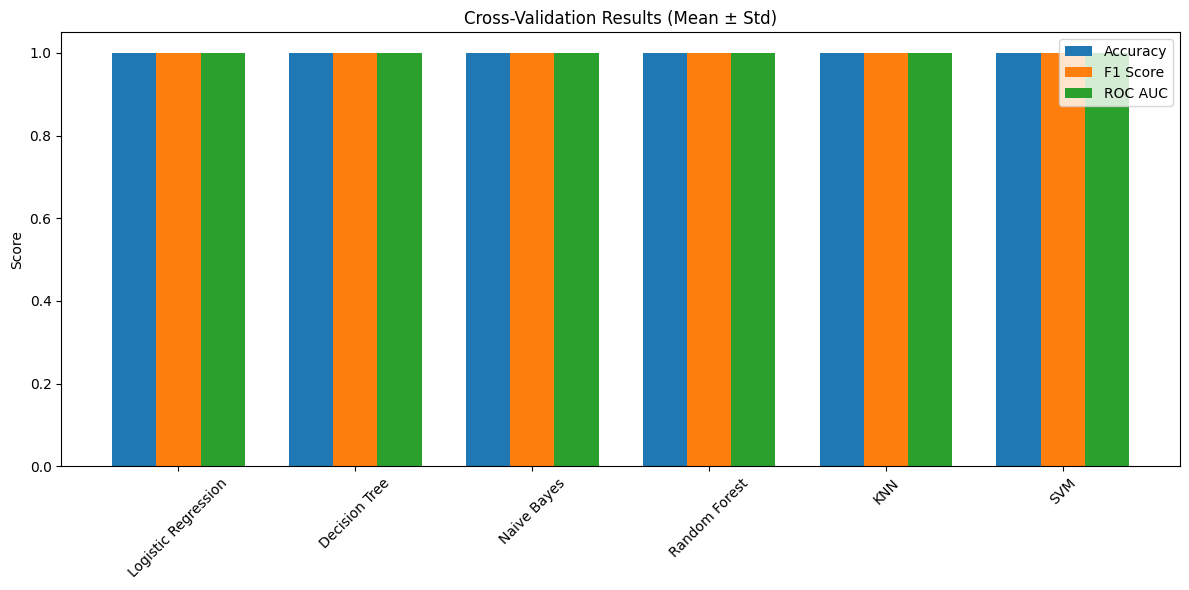

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Load dataset
df = pd.read_csv("Hybrid_Selected_BoT_IoT.csv")
X = df.drop(columns=['attack'])
y = df['attack']

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True)
}

# Setup CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = {}

# Run CV for each model
for name, model in models.items():
    acc_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1')
    roc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    
    results[name] = {
        'Accuracy Mean': acc_scores.mean(),
        'Accuracy Std': acc_scores.std(),
        'F1 Mean': f1_scores.mean(),
        'F1 Std': f1_scores.std(),
        'ROC AUC Mean': roc_scores.mean(),
        'ROC AUC Std': roc_scores.std()
    }

# Convert to DataFrame
results_df = pd.DataFrame(results).T.sort_values(by='F1 Mean', ascending=False)
print("✅ Cross-Validation Summary:\n")
print(results_df)

# Plot Accuracy, F1, ROC-AUC with error bars
plt.figure(figsize=(12, 6))
x = np.arange(len(results_df))
plt.bar(x - 0.25, results_df['Accuracy Mean'], yerr=results_df['Accuracy Std'], width=0.25, label='Accuracy')
plt.bar(x, results_df['F1 Mean'], yerr=results_df['F1 Std'], width=0.25, label='F1 Score')
plt.bar(x + 0.25, results_df['ROC AUC Mean'], yerr=results_df['ROC AUC Std'], width=0.25, label='ROC AUC')
plt.xticks(x, results_df.index, rotation=45)
plt.ylabel("Score")
plt.title("Cross-Validation Results (Mean ± Std)")
plt.legend()
plt.tight_layout()
plt.show()


## Experiment 13: Ensemble Learning

In this experiment, we applied multiple ensemble techniques to improve model performance:

- **Bagging:** Random Forest and BaggingClassifier with Decision Tree
- **Boosting:** AdaBoost, XGBoost, LightGBM
- **Stacking:** Combines multiple models with Logistic Regression as a meta-learner
- **Voting:** Combines model predictions using hard and soft voting

### Evaluation:
We compared all ensemble models using cross-validated **Accuracy**, **F1**, and **ROC-AUC** scores. The summary table and bar plot help identify the most effective ensemble approach.


[LightGBM] [Info] Number of positive: 44982, number of negative: 23927
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3862
[LightGBM] [Info] Number of data points in the train set: 68909, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.652774 -> initscore=0.631255
[LightGBM] [Info] Start training from score 0.631255
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

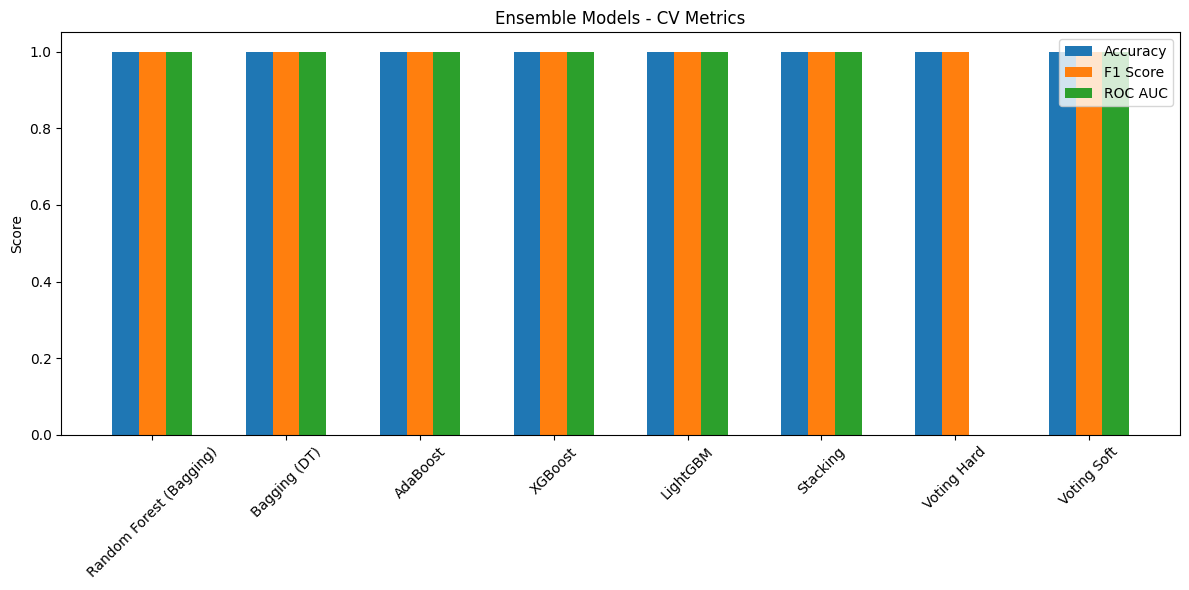

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import (
    RandomForestClassifier, BaggingClassifier,
    AdaBoostClassifier, VotingClassifier, StackingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Load dataset
df = pd.read_csv("Hybrid_Selected_BoT_IoT.csv")
X = df.drop(columns=["attack"])
y = df["attack"]

# CV setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Base learners
lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC(probability=True)
gnb = GaussianNB()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
lgb = LGBMClassifier()

# Ensemble models
models = {
    "Random Forest (Bagging)": rf,
    "Bagging (DT)": BaggingClassifier(dt, n_estimators=10, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "XGBoost": xgb,
    "LightGBM": lgb,
    "Stacking": StackingClassifier(
        estimators=[('lr', lr), ('rf', rf), ('svc', svc)],
        final_estimator=LogisticRegression()
    ),
    "Voting Hard": VotingClassifier(estimators=[
        ('lr', lr), ('rf', rf), ('dt', dt)], voting='hard'),
    "Voting Soft": VotingClassifier(estimators=[
        ('lr', lr), ('rf', rf), ('svc', svc)], voting='soft')
}

# Run CV
results = {}
for name, model in models.items():
    acc = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1')
    roc = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    
    results[name] = {
        "Accuracy Mean": acc.mean(),
        "F1 Mean": f1.mean(),
        "ROC AUC Mean": roc.mean()
    }

# Convert to DataFrame
res_df = pd.DataFrame(results).T.sort_values(by="F1 Mean", ascending=False)
print("✅ Ensemble Results:\n")
print(res_df)

# Plotting
x = np.arange(len(res_df))
plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, res_df["Accuracy Mean"], width=0.2, label="Accuracy")
plt.bar(x, res_df["F1 Mean"], width=0.2, label="F1 Score")
plt.bar(x + 0.2, res_df["ROC AUC Mean"], width=0.2, label="ROC AUC")
plt.xticks(x, res_df.index, rotation=45)
plt.ylabel("Score")
plt.title("Ensemble Models - CV Metrics")
plt.legend()
plt.tight_layout()
plt.show()
